In [1]:
from olfactorybulb.database import *
import os,sys
from neuronunit.tests.olfactory_bulb.publications import *
from neuronunit.tests.olfactory_bulb.tests import *
from neuronunit.models.neuron_cell import NeuronCellModel
from sciunit.suites import TestSuite
from pandas import DataFrame
import quantities as pq
from neuronunit.tests.olfactory_bulb.utilities import cache
from linetimer import CodeTimer
import string

/home/justas/anaconda2/envs/p27/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Could not load NEURONBackend


In [2]:
cell_type = 'mc'

# Load tests
measurements = Measurement\
    .select(Measurement)\
    .join(Property)\
    .switch(Measurement)\
    .join(Source)\
    .where((Measurement.property.type == "Electrophysiology") & (Measurement.property.id.startswith(cell_type+'_')))\
    .order_by(Measurement.property.id)

tests = []

for m in measurements:
    t = str(m.property.test_class_generic)
    pub = str(m.source.publication_class).strip()
    class_name = t+pub
    
    globals()[class_name] = type(class_name, 
                                 (eval(pub), eval(t)), 
                                 {})
    
    print('creating specific test class: ' + class_name)
    
    tests.append(eval(class_name)(observation={"mean": m.mean * eval(m.property.units), "std": m.std * eval(m.property.units), "n": m.n}))
    
    
# Load model classes
model_classes = list(CellModel\
                    .select(CellModel)\
                    .where(CellModel.cell_type == cell_type.upper())             
                     )
for i, m in enumerate(model_classes):
    nmsp = string.join(m.isolated_model_class.split('.')[:-1],'.')
    cls = m.isolated_model_class.split('.')[-1]

    import_cmd = 'from '+nmsp+' import '+cls+' as Model'+str(i)
    print(import_cmd)
    exec(import_cmd)
    
# Create work item list
work_items = []

for model in model_classes:
    work_items.append({"model_class": model.isolated_model_class })
        
def dowork(item):
    results = []
    
    import prev_ob_models
    exec('cell = '+ str(item["model_class"]) +'()')

    model = NeuronCellModel(cell.soma(0.5),name=cell.__class__.__module__+'.'+cell.__class__.__name__)


    for test in tests:
        try:
            print('Starting', item, test)
            result = test.generate_prediction(model)
            print('Finished', item, test, result)

        except:
            import traceback
            result = traceback.format_exc()
            print(result)

        results.append(result)

    return item["model_class"], results


creating specific test class: AfterHyperpolarizationAmplitudeTestYu2015
creating specific test class: AfterHyperpolarizationAmplitudeTestBurtonUrban2014
creating specific test class: AfterHyperpolarizationTimeTestYu2015
creating specific test class: AfterHyperpolarizationTimeTestBurtonUrban2014
creating specific test class: SpikeAmplitudeTestYu2015
creating specific test class: SpikeAmplitudeTestBurtonUrban2014
creating specific test class: SpikeHalfWidthTestYu2015
creating specific test class: SpikeHalfWidthTestBurtonUrban2014
creating specific test class: SpikePeakTestYu2015
creating specific test class: SpikeThresholdTestYu2015
creating specific test class: SpikeThresholdTestBurtonUrban2014
creating specific test class: CellCapacitanceTestYu2015
creating specific test class: CellCapacitanceTestBurtonUrban2014
creating specific test class: FISlopeTestBurtonUrban2014
creating specific test class: InputResistanceTestYu2015
creating specific test class: InputResistanceTestBurtonUrban201

('Starting', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.AfterHyperpolarizationAmplitudeTestYu2015 object at 0x7fd6256bd6d0>)


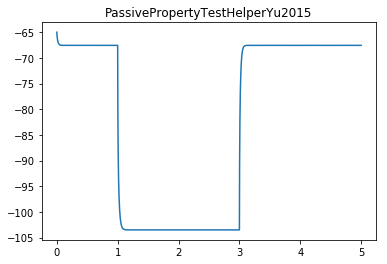

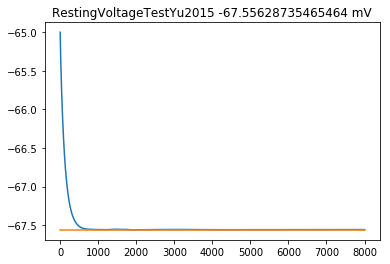

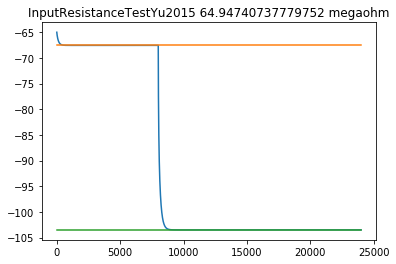

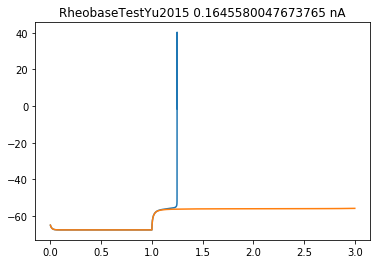

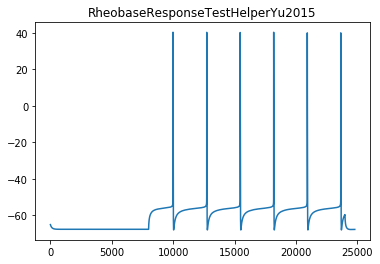

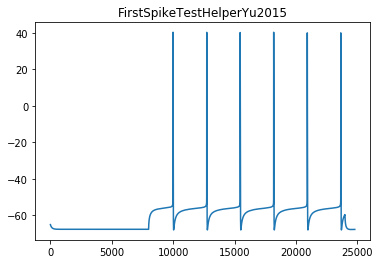

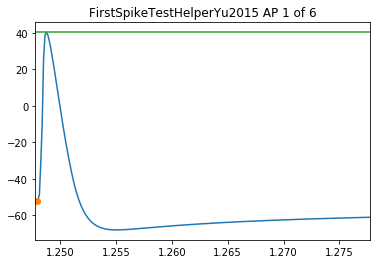

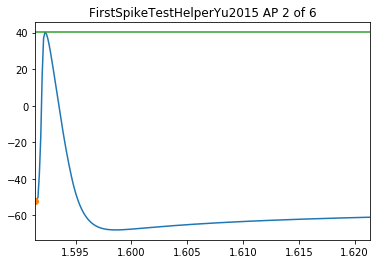

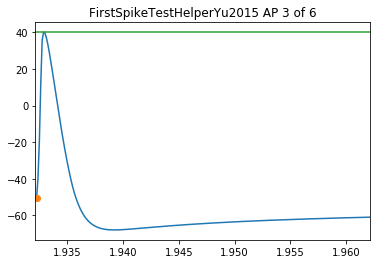

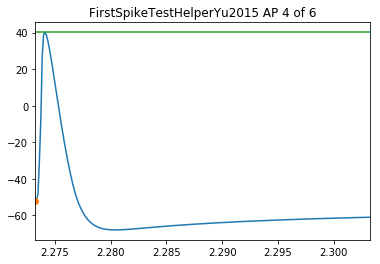

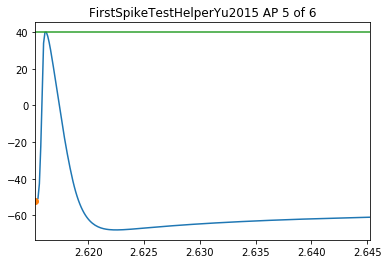

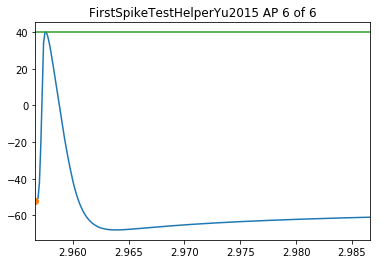

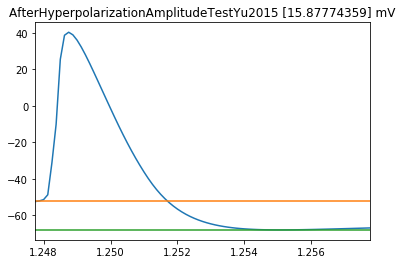

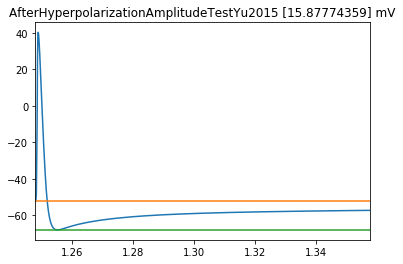

('Finished', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.AfterHyperpolarizationAmplitudeTestYu2015 object at 0x7fd6256bd6d0>, array([15.87774359]) * mV)
('Starting', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.AfterHyperpolarizationAmplitudeTestBurtonUrban2014 object at 0x7fd68c5eb4d0>)


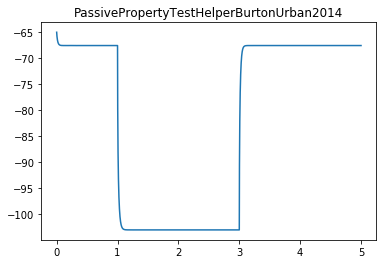

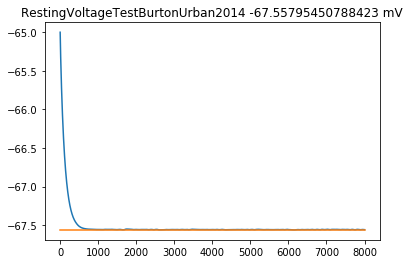

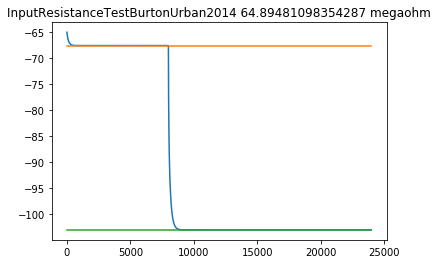

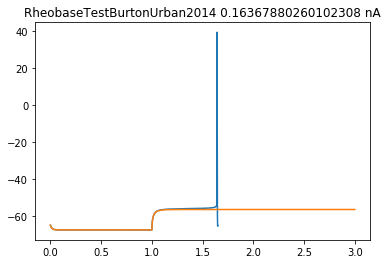

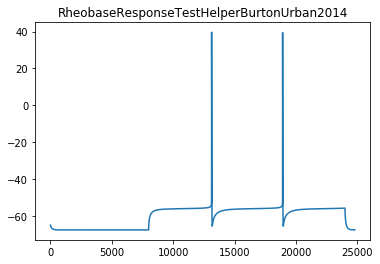

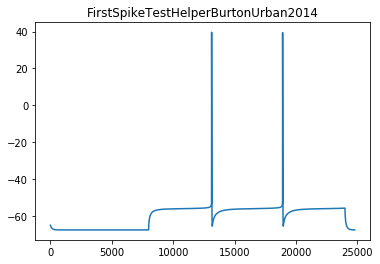

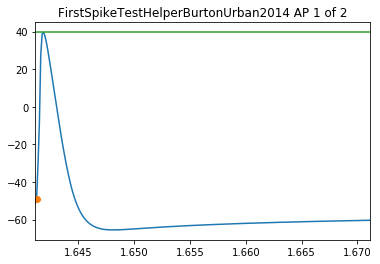

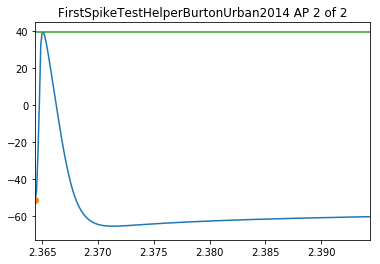

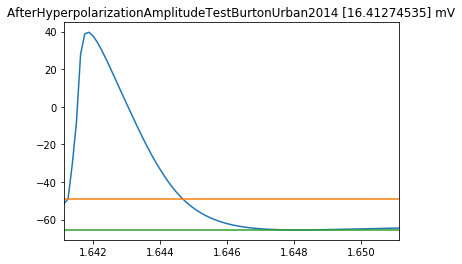

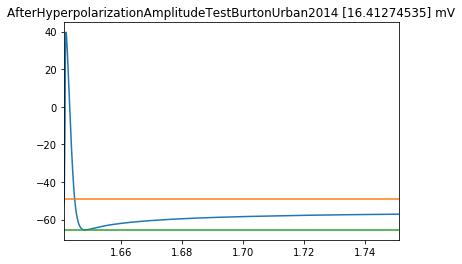

('Finished', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.AfterHyperpolarizationAmplitudeTestBurtonUrban2014 object at 0x7fd68c5eb4d0>, array([16.41274535]) * mV)
('Starting', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.AfterHyperpolarizationTimeTestYu2015 object at 0x7fd6256bdfd0>)


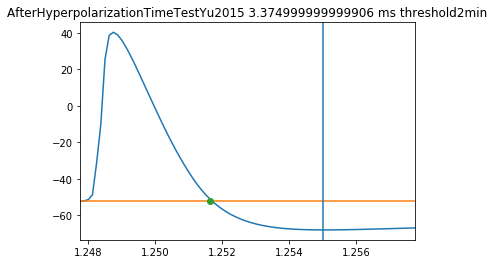

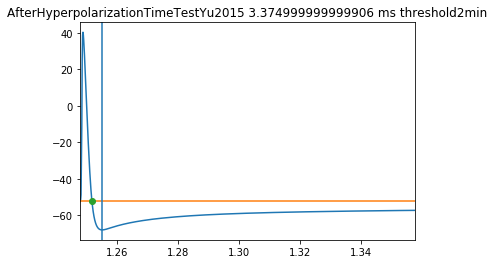

('Finished', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.AfterHyperpolarizationTimeTestYu2015 object at 0x7fd6256bdfd0>, array(3.375) * ms)
('Starting', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.AfterHyperpolarizationTimeTestBurtonUrban2014 object at 0x7fd62566b290>)


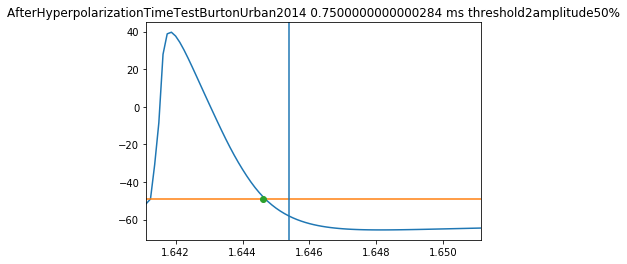

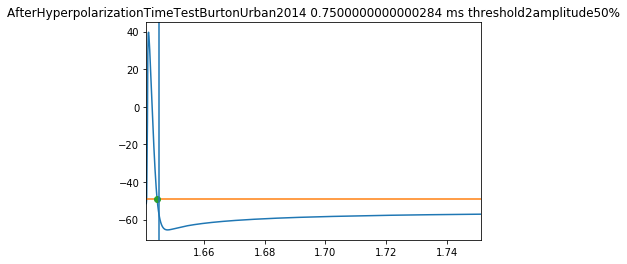

('Finished', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.AfterHyperpolarizationTimeTestBurtonUrban2014 object at 0x7fd62566b290>, array(0.75) * ms)
('Starting', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.SpikeAmplitudeTestYu2015 object at 0x7fd62566b510>)
('Finished', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.SpikeAmplitudeTestYu2015 object at 0x7fd62566b510>, array([92.25062319]) * mV)
('Starting', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.SpikeAmplitudeTestBurtonUrban2014 object at 0x7fd62566b810>)
('Finished', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.SpikeAmplitudeTestBurtonUrban2014 object at 0x7fd62566b810>, array([88.71716964]) * mV)
('Starting', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.SpikeHalfWidthTestYu2015 object at 0x7fd689d58450>)


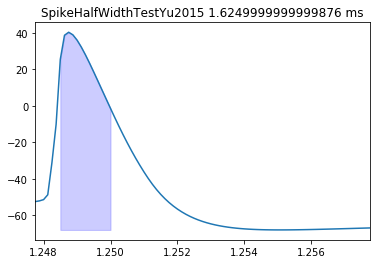

('Finished', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.SpikeHalfWidthTestYu2015 object at 0x7fd689d58450>, array(1.625) * ms)
('Starting', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.SpikeHalfWidthTestBurtonUrban2014 object at 0x7fd62566bb10>)


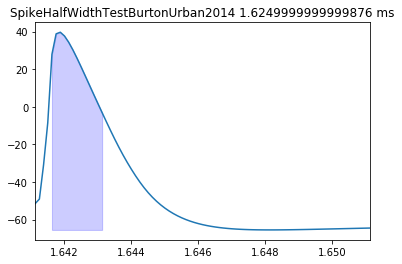

('Finished', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.SpikeHalfWidthTestBurtonUrban2014 object at 0x7fd62566bb10>, array(1.625) * ms)
('Starting', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.SpikePeakTestYu2015 object at 0x7fd62566b410>)
('Finished', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.SpikePeakTestYu2015 object at 0x7fd62566b410>, array(40.22977761) * mV)
('Starting', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.SpikeThresholdTestYu2015 object at 0x7fd62566b310>)
('Finished', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.SpikeThresholdTestYu2015 object at 0x7fd62566b310>, array([-52.02084558]) * mV)
('Starting', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.SpikeThresholdTestBurtonUrban2014 object at 0x7fd62566bd90>)
('Finished', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.SpikeThresholdTestBu

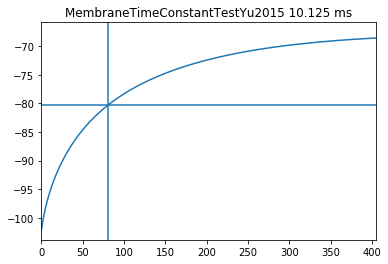

('Finished', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.CellCapacitanceTestYu2015 object at 0x7fd625602190>, array(155.8953684) * pF)
('Starting', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.CellCapacitanceTestBurtonUrban2014 object at 0x7fd6256bdc10>)


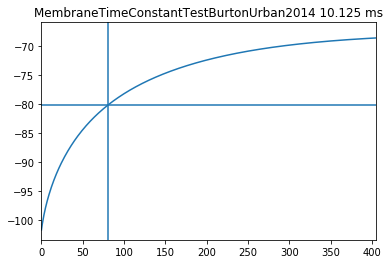

('Finished', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.CellCapacitanceTestBurtonUrban2014 object at 0x7fd6256bdc10>, array(156.02171956) * pF)
('Starting', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.FISlopeTestBurtonUrban2014 object at 0x7fd62566bdd0>)


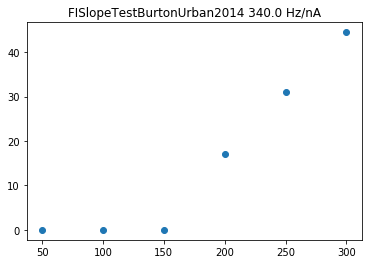

('Finished', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.FISlopeTestBurtonUrban2014 object at 0x7fd62566bdd0>, array(340.) * Hz/nA)
('Starting', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.InputResistanceTestYu2015 object at 0x7fd62566b9d0>)
('Finished', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.InputResistanceTestYu2015 object at 0x7fd62566b9d0>, array(64.94740738) * megaohm)
('Starting', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.InputResistanceTestBurtonUrban2014 object at 0x7fd62566b850>)
('Finished', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.InputResistanceTestBurtonUrban2014 object at 0x7fd62566b850>, array(64.89481098) * megaohm)
('Starting', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.InputResistanceTestAbraham2010 object at 0x7fd625602790>)


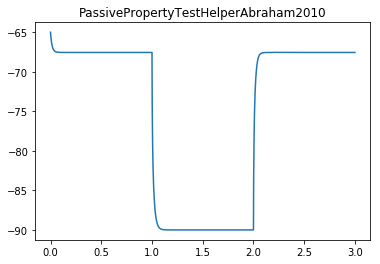

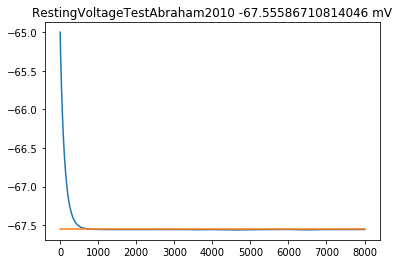

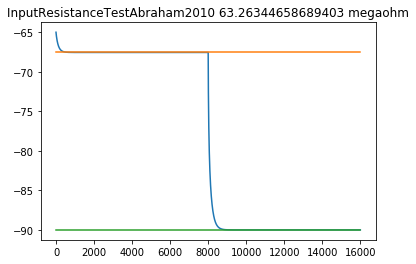

('Finished', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.InputResistanceTestAbraham2010 object at 0x7fd625602790>, array(63.26344659) * megaohm)
('Starting', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.InputResistanceTestHovis2010 object at 0x7fd625602310>)


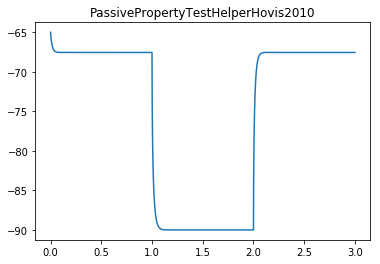

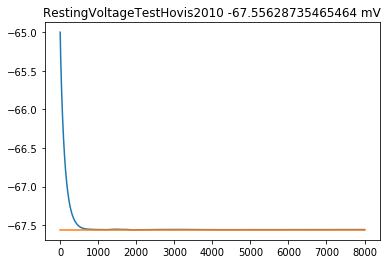

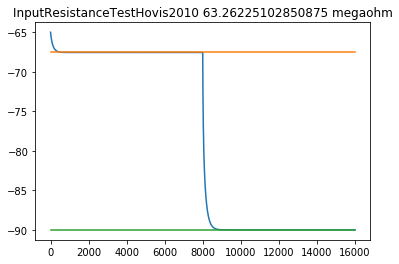

('Finished', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.InputResistanceTestHovis2010 object at 0x7fd625602310>, array(63.26225103) * megaohm)
('Starting', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.InputResistanceTestShpak2012 object at 0x7fd6256021d0>)


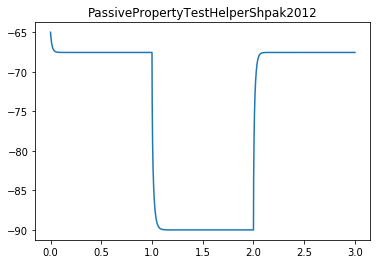

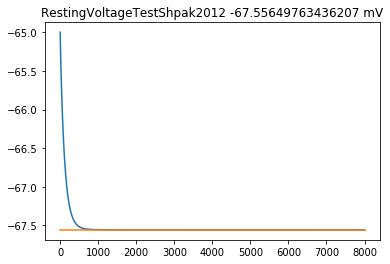

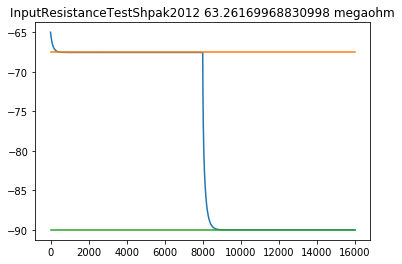

('Finished', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.InputResistanceTestShpak2012 object at 0x7fd6256021d0>, array(63.26169969) * megaohm)
('Starting', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.InputResistanceTestZibman2011 object at 0x7fd625602bd0>)


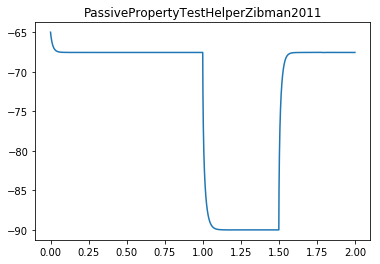

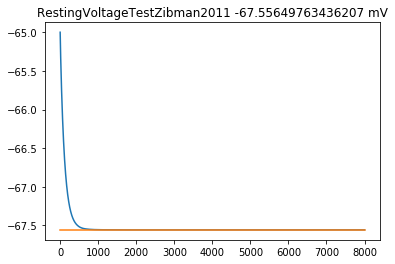

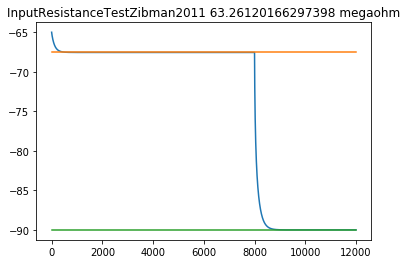

('Finished', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.InputResistanceTestZibman2011 object at 0x7fd625602bd0>, array(63.26120166) * megaohm)
('Starting', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.InputResistanceTestChristie2005 object at 0x7fd625602e50>)


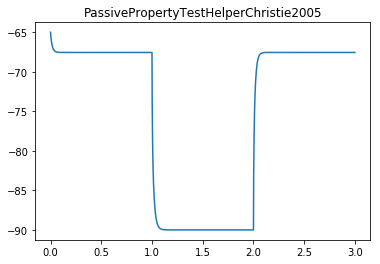

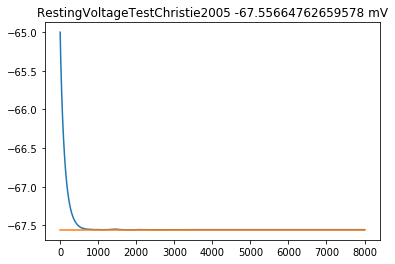

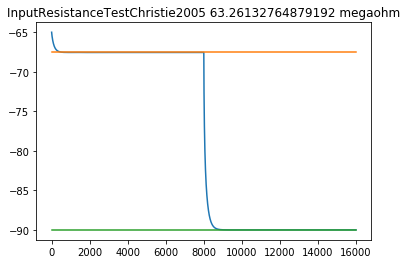

('Finished', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.InputResistanceTestChristie2005 object at 0x7fd625602e50>, array(63.26132765) * megaohm)
('Starting', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.InputResistanceTestFukunaga2012 object at 0x7fd625602f90>)


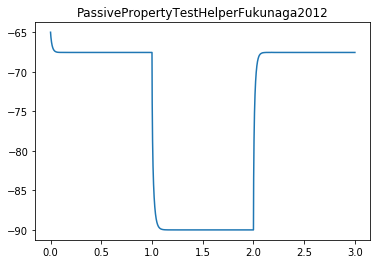

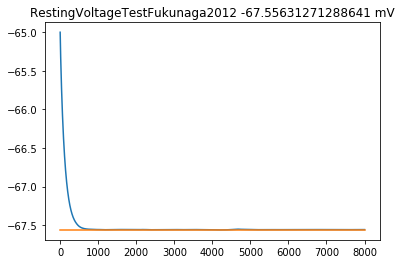

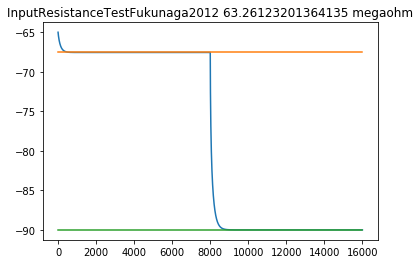

('Finished', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.InputResistanceTestFukunaga2012 object at 0x7fd625602f90>, array(63.26123201) * megaohm)
('Starting', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.ISICVTestYu2015 object at 0x7fd6256bdb50>)


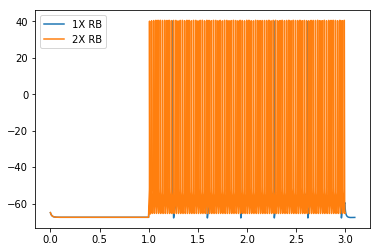

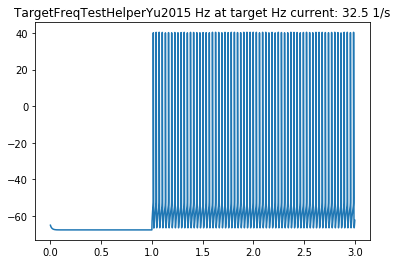

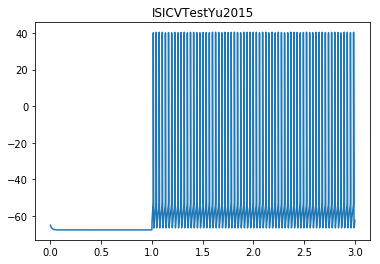

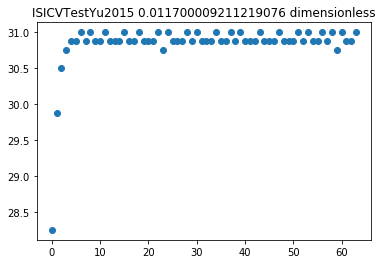

('Finished', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.ISICVTestYu2015 object at 0x7fd6256bdb50>, array(0.01170001) * dimensionless)
('Starting', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.ISICVTestBurtonUrban2014 object at 0x7fd6256028d0>)


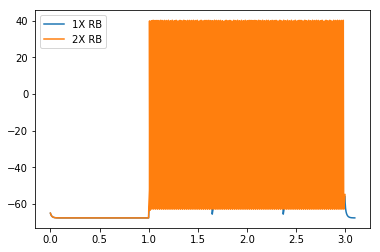

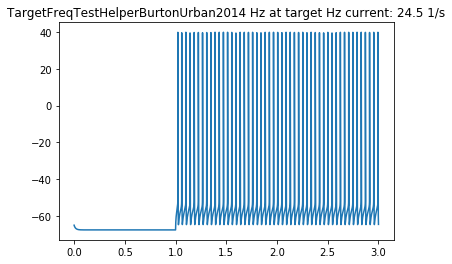

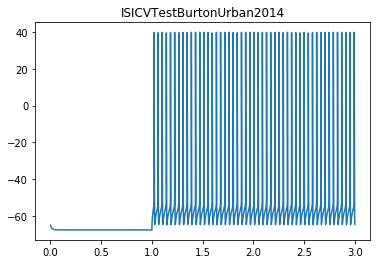

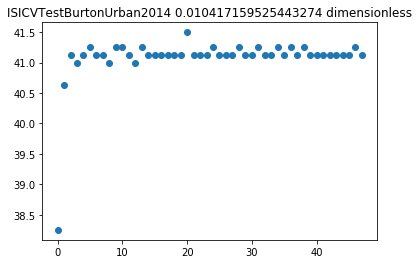

('Finished', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.ISICVTestBurtonUrban2014 object at 0x7fd6256028d0>, array(0.01041716) * dimensionless)
('Starting', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.ReboundSpikingTestBurtonUrban2014 object at 0x7fd62566b7d0>)


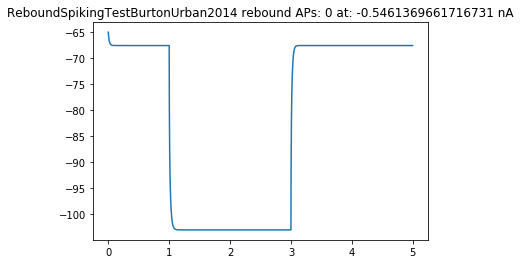

('Finished', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.ReboundSpikingTestBurtonUrban2014 object at 0x7fd62566b7d0>, False)
('Starting', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.ReboundSpikingTestJohnsonDelaney2010 object at 0x7fd625621110>)


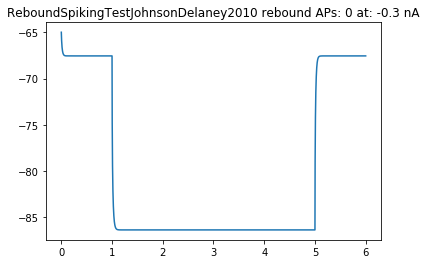

('Finished', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.ReboundSpikingTestJohnsonDelaney2010 object at 0x7fd625621110>, False)
('Starting', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.RestingVoltageTestYu2015 object at 0x7fd625621450>)
('Finished', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.RestingVoltageTestYu2015 object at 0x7fd625621450>, array(-67.55628735) * mV)
('Starting', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.RestingVoltageTestBurtonUrban2014 object at 0x7fd625621750>)
('Finished', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.RestingVoltageTestBurtonUrban2014 object at 0x7fd625621750>, array(-67.55795451) * mV)
('Starting', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.RestingVoltageTestAbraham2010 object at 0x7fd62566b1d0>)
('Finished', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.Restin

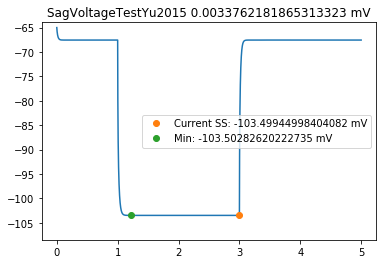

('Finished', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.SagVoltageTestYu2015 object at 0x7fd625621150>, array(0.00337622) * mV)
('Starting', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.SagVoltageTestBurtonUrban2014 object at 0x7fd625621cd0>)


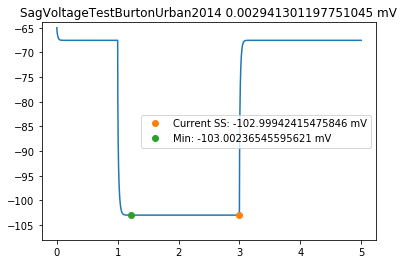

('Finished', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.SagVoltageTestBurtonUrban2014 object at 0x7fd625621cd0>, array(0.0029413) * mV)
('Starting', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.SagVoltageTestAngelo2012 object at 0x7fd6256380d0>)


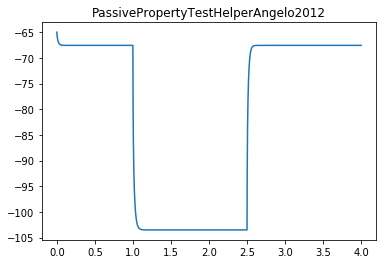

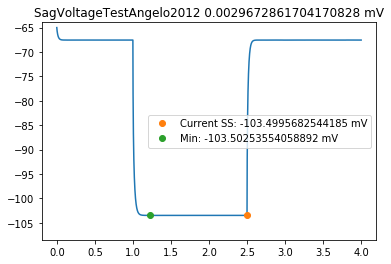

('Finished', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.SagVoltageTestAngelo2012 object at 0x7fd6256380d0>, array(0.00296729) * mV)
('Starting', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.SagVoltageTestHu2016 object at 0x7fd6256382d0>)


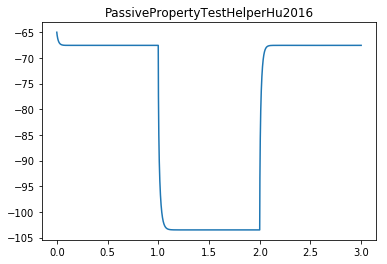

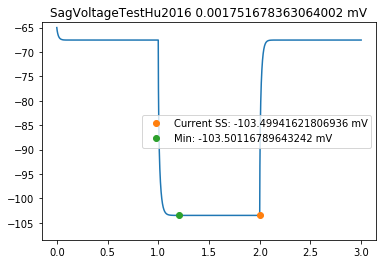

('Finished', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.SagVoltageTestHu2016 object at 0x7fd6256382d0>, array(0.00175168) * mV)
('Starting', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.SpikeAccommodationTestBurtonUrban2014 object at 0x7fd625621c90>)


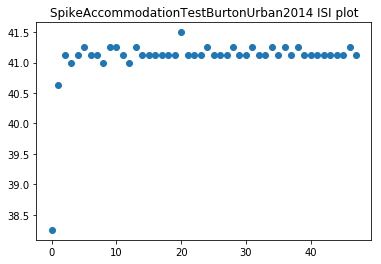

('Finished', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.SpikeAccommodationTestBurtonUrban2014 object at 0x7fd625621c90>, array(-1.82768143) * Hz)
('Starting', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.SpikeAccommodationTestZibman2011 object at 0x7fd625621f10>)


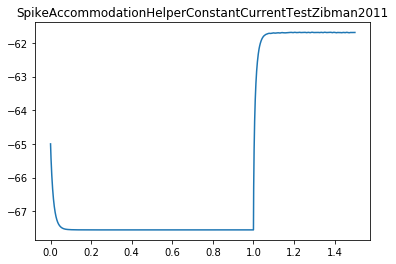

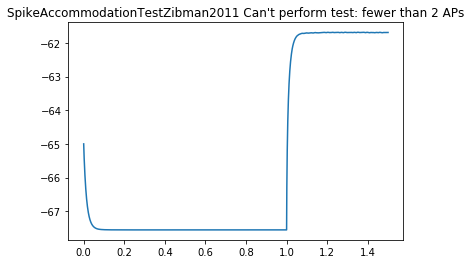

('Finished', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.SpikeAccommodationTestZibman2011 object at 0x7fd625621f10>, array(0.) * Hz)
('Starting', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.SpikeAccommodationTimeConstantTestBurtonUrban2014 object at 0x7fd625621990>)
[[Model]]
    Model(ifr_func)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 48
    # variables        = 3
    chi-square         = 0.10957915
    reduced chi-square = 0.00243509
    Akaike info crit   = -285.950842
    Bayesian info crit = -280.337239
[[Variables]]
    start:   26.1439273 +/- 0.04932684 (0.19%) (init = 26.14379)
    finish:  24.2972661 +/- 0.00734012 (0.03%) (init = 24.31611)
    tau:     22.9350893 +/- 1.97969400 (8.63%) (init = 10)
[[Correlations]] (unreported correlations are < 0.100)
    C(finish, tau) = -0.173
    C(start, tau)  = -0.166



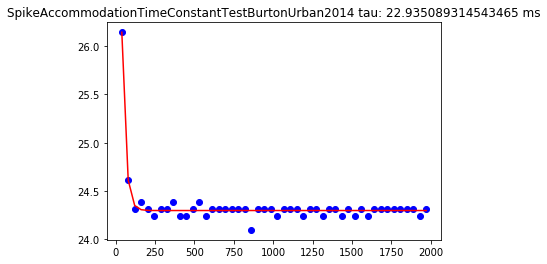

('Finished', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.SpikeAccommodationTimeConstantTestBurtonUrban2014 object at 0x7fd625621990>, array(22.93508931) * ms)
('Starting', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.SpikeAccommodationTimeConstantTestZibman2011 object at 0x7fd625638550>)
('Finished', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.SpikeAccommodationTimeConstantTestZibman2011 object at 0x7fd625638550>, array(500.) * ms)
('Starting', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.MembraneTimeConstantTestYu2015 object at 0x7fd625638810>)
('Finished', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.MembraneTimeConstantTestYu2015 object at 0x7fd625638810>, array(10.125) * ms)
('Starting', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.MembraneTimeConstantTestBurtonUrban2014 object at 0x7fd625638710>)
('Finished', {'model_class': 

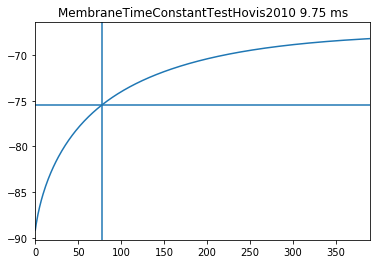

('Finished', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.MembraneTimeConstantTestHovis2010 object at 0x7fd6256388d0>, array(9.75) * ms)
('Starting', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.MembraneTimeConstantTestZibman2011 object at 0x7fd625638b90>)


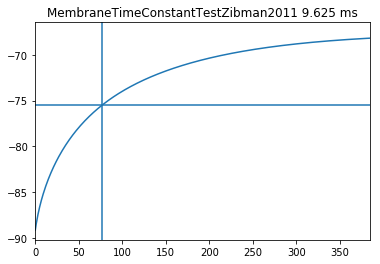

('Finished', {'model_class': u'prev_ob_models.Yu2012.isolated_cells.MC'}, <__main__.MembraneTimeConstantTestZibman2011 object at 0x7fd625638b90>, array(9.625) * ms)
FINISHED


In [3]:
cache.clear()
i = 24 #Max: 24, skipped 8-11
for item in [work_items[i]]:
    dowork(item)

print("FINISHED")

In [4]:
raise Exception()

Exception: 

In [ ]:
# Run the tests
processes = 15   
from multiprocessing import Pool
pool = Pool(processes = processes, maxtasksperchild=1)
result = pool.map(dowork, work_items)
pool.terminate()
pool.join()
result

# Show result in a table
df = []
for model in result:
    row = {"model": model[0]}
    for t, test in enumerate(tests):
        row[test.__class__.__name__] = model[1][t]
    df.append(row)
        
df = DataFrame(df)
df


In [ ]:
df

In [ ]:
raise Exception()

In [ ]:
cache.clear()
import prev_ob_models
cell = prev_ob_models.Oconnor2012.isolated_cells.MC6()
model = NeuronCellModel(cell.soma(0.5),name=cell.__class__.__module__+'.'+cell.__class__.__name__)
AfterHyperpolarizationTimeTestYu2015().generate_prediction(model)

In [ ]:
model = None
cell = None
raise Exception()

In [ ]:
for i, test in enumerate(tests):
    #print(i, 'judging', test)
    print(test.generate_prediction(model))
    

In [ ]:
test.observation

In [ ]:
with CodeTimer():
    TestSuite(tests).judge(model)

In [ ]:
from neuronunit.tests.olfactory_bulb.utilities import cache
#cache.clear()

In [ ]:

class Test(BurtonUrban2015, SpikeThresholdTest):
    pass

test = Test().generate_prediction(model)

In [ ]:
test

In [ ]:
#rb = RheobaseTestBurtonUrban2014().generate_prediction(model)
rb = 0.02438785 * pq.nA

In [ ]:
SpikeAccommodationTimeConstantTestZibman2011(rb).generate_prediction(model)

In [ ]:
SpikeAccommodationTestBurtonUrban2014(rb).generate_prediction(model)

In [ ]:
ISICVTestBurtonUrban2014(rb).generate_prediction(model)

In [ ]:
rb = RheobaseTestYu2015().generate_prediction(model)

In [ ]:
ISICVTestYu2015(rb).generate_prediction(model)

In [ ]:
0/0

In [ ]:
ReboundSpikingTestBurtonUrban2014().generate_prediction(model)

In [ ]:
ReboundSpikingTestJohnsonDelaney2010().generate_prediction(model)

In [ ]:
rb = RheobaseTestBurtonUrban2014().generate_prediction(model)
rb

In [ ]:
voltage = model.inject_square_current({"delay": 1000*pq.ms,"duration": 2000*pq.ms, "amplitude": rb})

In [ ]:
plt.plot(voltage)

In [ ]:
voltage.magnitude[np.where(voltage.times > 1000*pq.ms)]

In [ ]:
rb = 0.02438782 * pq.nA

In [ ]:
# %matplotlib notebook
# %matplotlib notebook
# %matplotlib notebook
# %matplotlib notebook

In [ ]:
rb = RheobaseTestYu2015().generate_prediction(model)
rb

In [ ]:
SagVoltageTestAngelo2012().generate_prediction(model)
SagVoltageTestBurtonUrban2014().generate_prediction(model)
SagVoltageTestYu2015().generate_prediction(model)
SagVoltageTestHu2016().generate_prediction(model)

In [ ]:
AfterHyperpolarizationAmplitudeTestYu2015(rb).generate_prediction(model)

In [ ]:
AfterHyperpolarizationTimeTestYu2015(rb).generate_prediction(model)

In [ ]:
AfterHyperpolarizationAmplitudeTestBurtonUrban2014(rb).generate_prediction(model)

In [ ]:
AfterHyperpolarizationTimeTestBurtonUrban2014(rb).generate_prediction(model)

In [ ]:
1/0

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

v = aps[0]
plt.plot(v["voltage"])
#plt.plot(v3_z[0:get_zero_crossings(v3_z)[0]+1])
#plt.xlim((0,80))
plt.show()

In [ ]:
test1 = SagVoltageTestAngelo2012(observation={"mean":0*pq.mV, 'std':1*pq.mV,'n': 10})
test2 = SagVoltageTestBurtonUrban2014(observation={"mean":0*pq.mV, 'std':1*pq.mV,'n': 10})
test3 = SagVoltageTestYu2015(observation={"mean":0*pq.mV, 'std':1*pq.mV,'n': 10})
test4 = SagVoltageTestHu2016(observation={"mean":0*pq.mV, 'std':1*pq.mV,'n': 10})

#suite = test1 
suite = TestSuite(tests=[test1,test2,test3,test4])

In [ ]:
suite.judge(model)